In [6]:
# 📊 Superstore Sales Analysis
# A complete exploratory data analysis (EDA) of sales, profit, and category trends using the Superstore dataset.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## 🧹 1. Load & Clean Data

In [20]:
sales_df = pd.read_csv("C:/Users/ASWIN/Documents/python/projects/Superstore.csv", encoding="latin1")
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Ship Date'] = pd.to_datetime(sales_df['Ship Date'])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
## 🩺 2. Handle Missing Values

In [21]:
def missing_values(df):
    missing = df.isna().sum()
    return missing[missing > 0]

missing_values(sales_df)

Series([], dtype: int64)

In [23]:
# Fix missing Row ID
if sales_df['Row ID'].isna().sum() > 0:
    missing_sum = sales_df['Row ID'].isna().sum()
    start = sales_df['Row ID'].max() + 1
    sales_df.loc[sales_df['Row ID'].isna(), 'Row ID'] = np.arange(start, start + missing_sum)

In [ ]:
## 🧽 3. Remove Duplicates

In [24]:
sales_df.drop_duplicates(inplace=True)

In [ ]:
## 📈 4. Sales Trends Over Time
Daily, Weekly, Monthly, and Yearly aggregated sales.

In [25]:
sales_df = sales_df.set_index("Order Date")

daily_sales = sales_df['Sales'].resample('D').sum()
weekly_sales = sales_df['Sales'].resample('W').sum()
monthly_sales = sales_df['Sales'].resample('ME').sum()
yearly_sales = sales_df['Sales'].resample('YE').sum()

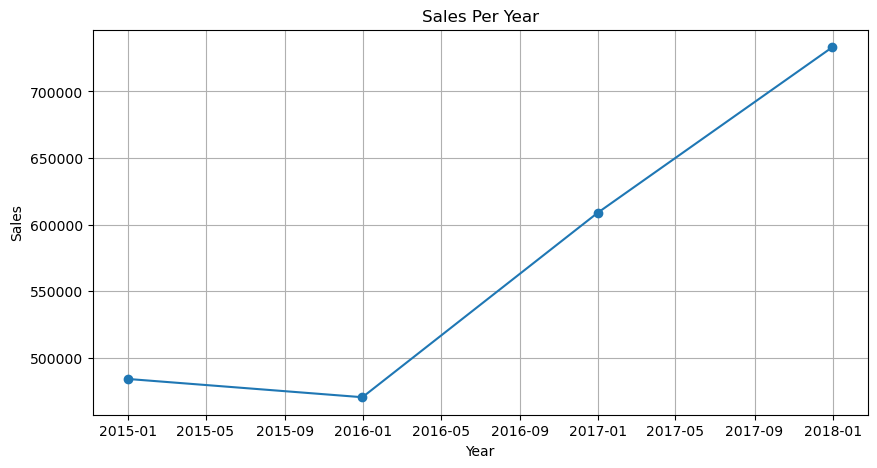

In [26]:
plt.figure(figsize=(10,5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title("Sales Per Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

In [ ]:
## 🏆 5. Top Selling Products

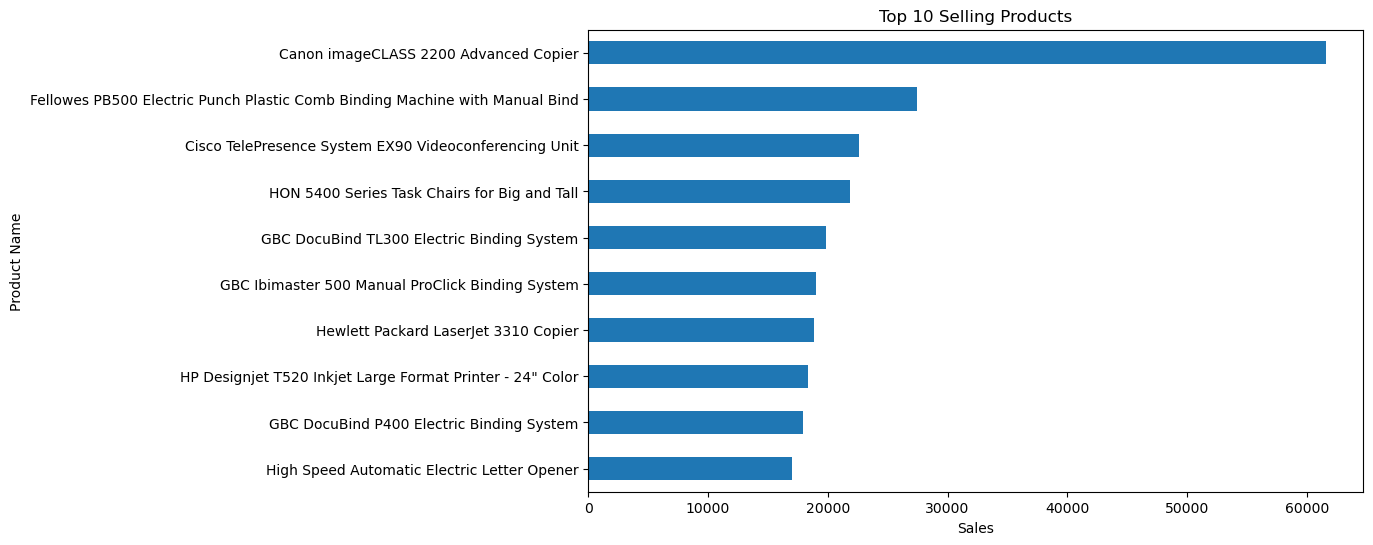

In [27]:
product_sales = sales_df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False)
top_10 = product_sales.head(10)

plt.figure(figsize=(10,6))
top_10.plot(kind="barh")
plt.title("Top 10 Selling Products")
plt.xlabel("Sales")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
## 🌍 6. Regional Sales Comparison

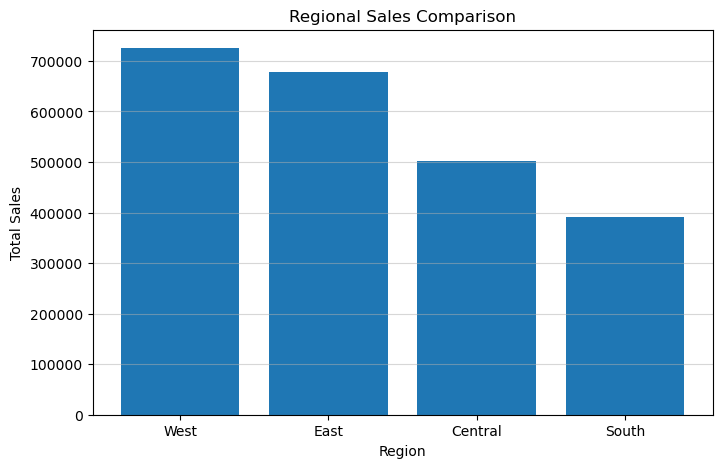

In [28]:
regional_sales = sales_df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(regional_sales.index, regional_sales.values)
plt.title("Regional Sales Comparison")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
## 💰 7. Most Profitable Region

In [29]:
region_profit = sales_df.groupby("Region")["Profit"].sum().sort_values(ascending=False)
region_profit

Region
West       108418.4489
East        91522.7800
South       46707.5167
Central     39706.3625
Name: Profit, dtype: float64

In [30]:
print("Most Profitable Region:", region_profit.idxmax())
print("Profit:", region_profit.max())

Most Profitable Region: West
Profit: 108418.4489


In [ ]:
## ⚠️ 8. Categories Losing Money

In [31]:
category_profit = sales_df.groupby("Category")["Profit"].sum().sort_values()
categories_losing = category_profit[category_profit < 0]
categories_losing

Series([], Name: Profit, dtype: float64)

In [2]:
## 🔥 9. Heatmap — Sales by Region & Category

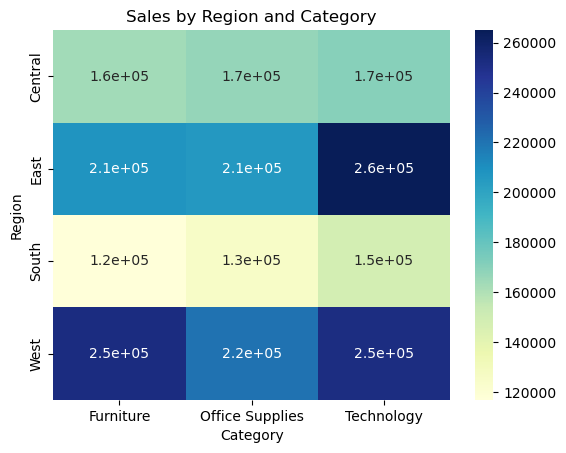

In [32]:
pivot_table = sales_df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Sales by Region and Category")
plt.show()

In [3]:
## 💵 10. Profit vs Sales Relationship

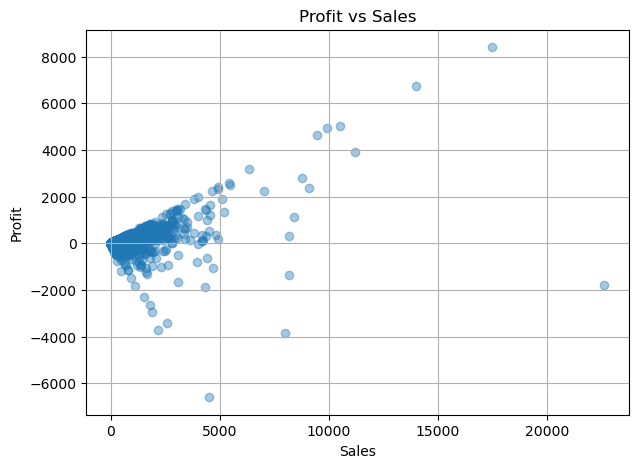

In [33]:
plt.figure(figsize=(7,5))
plt.scatter(sales_df["Sales"], sales_df["Profit"], alpha=0.4)
plt.title("Profit vs Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

In [4]:
## 🥧 11. Category Market Share (Pie Chart)

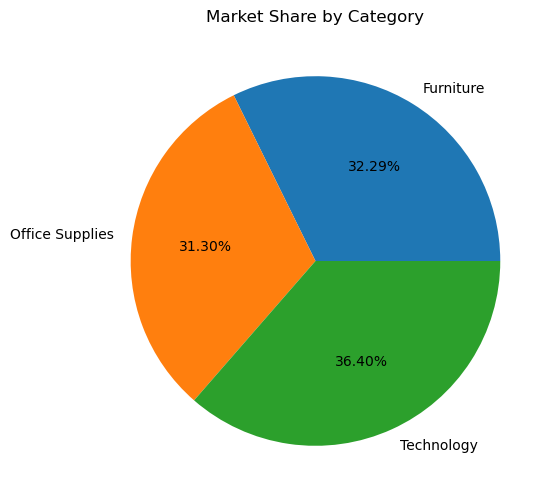

In [34]:
cat_sales = sales_df.groupby("Category")["Sales"].sum()
share = (cat_sales / cat_sales.sum()) * 100

plt.figure(figsize=(6,6))
plt.pie(share.values, labels=share.index, autopct="%.2f%%")
plt.title("Market Share by Category")
plt.show()